# Цифровая обработка сигналов - 1

| **Title**         | Digital signal processing |
| --- | --- |
| **Author**        | Alexander Kapitanov       |
| **Contact**       | sallador@bk.ru            |
| **Project lang**  | Python                    |
| **Packages**      | numpy, scipy, matplotlib  |
| **License**       | GNU GPL 3.0               |


## Введение

Перед вами обучающий материал по основам **цифровой обработки сигналов** с использованием средств языка программирования Python. Предполагается, что читатель имеет базовые знания из области высшей математики, а также владеет языком Python и хотя бы поверхностно знает различные python-библиотеки - numpy/scipy, matplotlib и другие. 

Для пользователей MATLAB / GNU Octave освоение материала с точки зрения программного кода не составит труда, поскольку основные функции и их атрибуты во многом идентичны и схожи с методами из python-библиотек.


## Сигналы

*Сигналом* называется физический процесс, параметры которого изменяются в соответствии с передаваемым сообщением. Cигнал является материальным носителем информации. По способу представления сигналы разделяются на две группы – *случайные* и *детерминированные*. Их описывают математической моделью или функцией, характеризующей изменение параметров сигнала.  

*Случайным* сигналом называют функцию времени, значения которой заранее неизвестны и могут быть предсказаны лишь с некоторой *вероятностью*. К основным характеристикам случайных сигналов относятся:

* закон распределения (относительное время пребывания значения сигнала в определенном интервале),
* спектральное распределение мощности.

*Детерминированные* сигналы описываются аналитической функцией (задаются аналитически), и их поведение полностью известно в любой момент времени. Детерминированные сигналы в свою очередь бывают *периодическими* и *непериодическими*. Непериодические сигналы, как правило, ограничены во времени. 

*Периодический* сигнал - это сигнал, который повторяется во времени с определенным периодом, то есть для которого выполняется условие:

$s(t) = s(t+kT)$, 

где *k* – любое целое число, *T* – период повторения.

Пример *периодического* сигнала – гармоническое колебание, описываемое следующим выражением:

$s(t) = A \cdot cos(\frac{2\pi\cdot t}{T} +\phi)$, 

где *A* – амплитуда колебания, φ – начальная фаза. 

Известно, что любой сложный периодический сигнал может быть представлен в виде суммы гармонических колебаний с частотами, кратными основной частоте **ω = 2π/T**. 

### Цифровые сигналы

Все сигналы можно разделить на четыре группы: 
* аналоговые, 
* дискретные, 
* квантованные,
* цифровые.

**Аналоговый** сигнал – описывается непрерывной функцией времени. Аналоговый сигнал обеспечивает передачу данных путем непрерывного изменения во времени амплитуды, частоты или фазы. Практически все физические процессы описываются непрерывными функциями времени, поэтому представляют собой аналоговые сигналы. Для аналогового сигнала область значений и определения описывается *непрерывным множеством*. 

Для **дискретного** сигнала свойственно прерывистое (дискретное) изменение сигнала во времени. То есть изменения в сигнале происходят скачкообразно через некоторые промежутки времени, называемые интервалом дискретизации – Δt или Td. Дискретизация *аналогового сигнала* состоит в том, что сигнал представляется в виде последовательности значений, взятых в дискретные моменты времени, которые называются *отсчётами* (сэмплами). 

Для правильного восстановления аналогового сигнала из цифрового без искажений и потерь используется теорема отсчетов, известная как **теорема Котельникова (Найквиста-Шеннона)**. 

> Любой непрерывный сигнал с ограниченным спектром может быть восстановлен однозначно и без потерь по своим дискретным отсчетам, взятым с частотой строго больше удвоенной верхней частоты спектра непрерывного сигнала. 

Формула теоремы Котельникова:  

$F_s = \frac{1}{T_s} > 2F_a$, 

где
* F<sub>s</sub> - частота дискретизации сигнала,
* F<sub>a</sub> - верхняя частота спектра аналогового сигнала.

**Квантованные** сигналы принимают ряд конечных значений из диапазона непрерывных или дискретных величин. Как правило, сигналы квантуются по уровню, то есть по амплитуде.

**Цифровые** сигналы получаются из аналоговых с помощью операций **дискретизации** и **квантования** по уровню. Значениям цифрового сигнала присваивается кодовое слово или набор символов (зачастую двоичных). 

Устройства, осуществляющие дискретизацию по времени и квантование по уровню, называются **аналого-цифровыми преобразователями (АЦП)**.
Устройства, переводящие цифровой сигнал в аналоговый называются **цифро-аналоговыми преобразователями (ЦАП)**. 
____
Для работы с сигналами в **Python** потребуется ряд предварительных действий.  
Необходимо импортировать библиотеку *numpy* для оперативного и качественного выполнения математических действий, а также графические средства отображения из библиотеки *matplotlib*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

%matplotlib inline

Напомним, что магическая функция `%matplotlib inline` позволяет отображать графики без вызова метода `plt.show()`

На приведенном ниже примере представлены сигналы в аналоговой, дискретной и квантованной форме.

**Шаг 1**: создать ряд временных значений:
Функция `np.linspace(start, stop, num)` задает вектор в диапазоне [start, stop], а *num* - количество точек в диапазоне.

**Шаг 2**: создать сигнал произвольной формы:
С помощью функции `np.sin()` задаём сигнал из набора гармонических воздействий. Для простоты амплитуды всех компонент равны 1, а смещение по фазе нулевое.

**Шаг 3** Отрисовка графиков.
Методы matplotlib задают различный стиль отображения:
* `plot()` - стандартный график, выводит сигнал в аналоговой форме,
* `stem()` - график в виде отсчетов, выводит сигнал в дискретной форме,
* `step()` - график в виде уровней, выводит сигнал в квантованной форме.

Для уменьшения количества кода создана вспомогательная функция `plt_sel(s, *args, **kwargs)`, которая выбирает стиль отображения графика. Аргументы `*args` передают значения по осям ординат и абсцисс, `**kwargs` используется для передачи параметров в метод `stem()`.

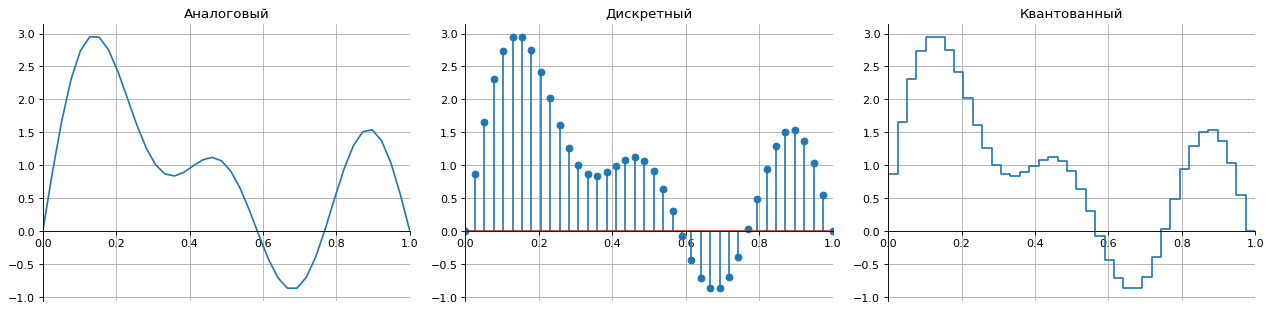

In [2]:
n = 40
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
x = np.sin(np.pi*t) + np.sin(2*np.pi*t) + np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

# Select: plot, stem, bar
def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)
    if s == 1:
        return plt.stem(*args, **kwargs)
    if s == 2:
        return plt.step(*args)

# Subplot titles
t_titles = ['Аналоговый', 'Дискретный', 'Квантованный']

# Plot figures
fig = plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i]) 
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9))
    plt.grid(True)
    
    # change plot view
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
plt.tight_layout()

Если шаг квантования и дискретизации выбраны неправильно, преобразование сигнала из аналоговой формы в дискретную будет происходить с искажениями. Покажем на примере неграмотный выбор шага дискретизации и шага квантования.

Зададим график синуса. Длина сигнала `n = 64` отсчетов, на которых укладывается один период гармонического сигнала. Установим шаг квантования таким образом, чтобы иметь выборку из `d = 3, 5, 8 и 32` отсчетов.

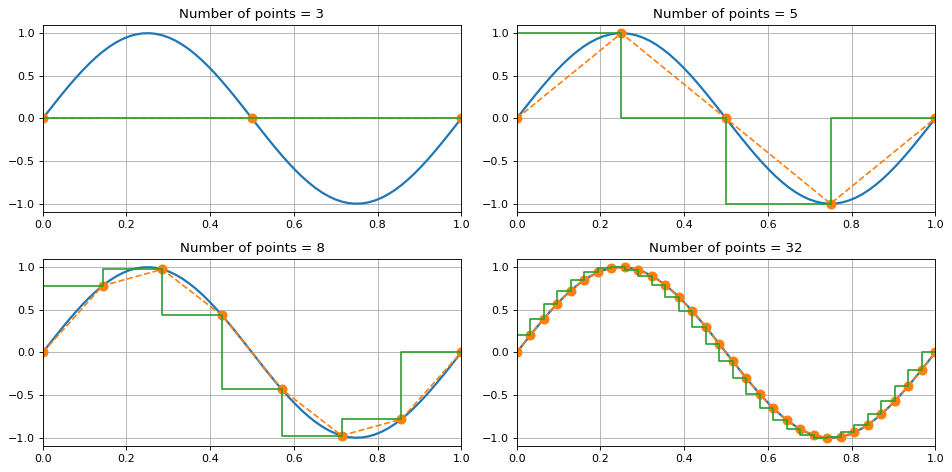

In [3]:
n = 64
# time vector
t = np.linspace(0, 1, n, endpoint=True)
# sine wave
ds = np.sin(2*np.pi*t)

# discrete step
step_lst = np.array([3, 5, 8, 32])

#plot figure
fig = plt.figure(figsize=(12, 6), dpi=80)
for i in range(4):
    tt = np.linspace(0, 1, step_lst[i], endpoint=True)
    
    plt.subplot(2, 2, i+1)
    plt.title('Number of points = {}'.format(step_lst[i]))
    plt.plot(t, ds, '-', linewidth=2.0)
    plt.plot(tt, np.sin(2*np.pi*tt), '--o', linewidth=1.5, markersize=8)
    plt.step(tt, np.sin(2*np.pi*tt), linewidth=1.5)
    plt.grid()
    plt.xlim([0, 1])
plt.tight_layout()

Как видно, наихудшая форма сигнала получилась при большом значении шага дискретизации, то есть большом расстоянии между соседними отсчетами цифрового сигнала. 
Чем меньше расстояние между соседними отсчетами (меньше шаг дискретизации и больше число точек последовательности), тем лучше дискретный сигнал повторяет форму аналогового сигнала.
____

### Дискретные последовательности

**Дискретной последовательностью** называется математическая модель дискретного сигнала, представляющая собой решетчатую функцию: x(nT) = x(n), где *T* – интервал дискретизации, *n* = 0, 1, 2, ..., N-1 - отсчёты или сэмплы. 

Пример конечной дискретной последовательности `x(nT) = {2, 1, -2, 0, 2, 3, 1, 0}`. Данная последовательность выглядит, как показано на рисунке:

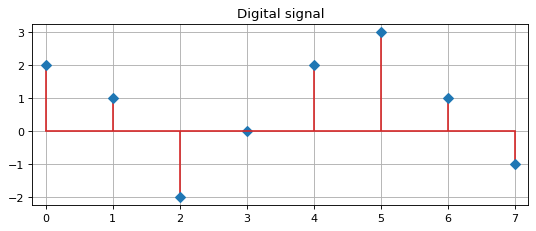

In [4]:
# Digital signal
xt = np.array([2, 1, -2, 0, 2, 3, 1, -1])
# Time vector
t = np.linspace(0, xt.size-1, xt.size, endpoint=True)

# Plot figure
fig = plt.figure(figsize=(8, 3), dpi=80)
plt.title('Digital signal') 
plt.stem(t, xt, linefmt='C3', markerfmt='D', use_line_collection=True)
plt.xticks(t)
plt.xlim([np.min(t)-0.2, np.max(t)+0.2])
plt.grid(True)

### Дельта-функция

**Единичный импульс** – простейшая дискретная последовательность. Это дискретная δ-функция δ(nT) *Дирака*, которая равна единице при n = 0 и нулю при всех остальных значениях n.

Дискретная δ-функция, смещенная во времени на **m** тактовых интервалов, записывается следующим образом: `δ(nT-mT)`.

### Единичный скачок

Единичный скачок или **функция Хевисайда** – еще один вид простых и важных дискретных последовательностей. Он принимает нулевые значения в отрицательной области времени и единичные значения в положительной. 

Математически функция единичного скачка записывается как: 

`σ(nT) = δ(nT) + δ(nT - T) + δ(nT – 2T) + ...`

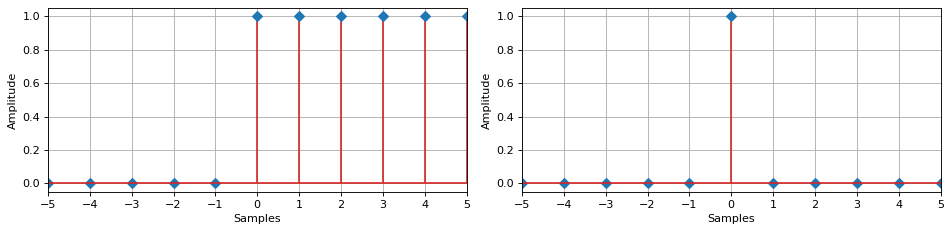

In [5]:
n = 6
# time vector
t = np.linspace(-n, n-1, 2*n)

# Delta function
xd = np.zeros(2*n)
xd[n] = 1

# Heaviside function
xh = np.heaviside(t, 1)

# Combine them together
xs = [xh, xd]

# Plot results
fig = plt.figure(figsize=(12, 3), dpi=80)
for i, sig in enumerate(xs):
    plt.subplot(1, 2, i+1)
    plt.stem(t, sig, linefmt='C3', markerfmt='D', use_line_collection=True)
    plt.ylabel('Amplitude')
    plt.xlabel('Samples')
    plt.xticks(t)
    plt.xlim([np.min(t)+1, np.max(t)])
    plt.grid(True)
plt.tight_layout()

Дискретный единичный скачок `σ(n)` и дискретная δ-функция `δ(n)` связаны между собой следующими соотношениями:

$\delta(nT) = \sigma(nT) - \sigma(nT-T)$ , 

$\sigma(nT) = \sum_{k=0}^{+\infty}\delta(nT-kT)$ ,

Произвольная дискретная последовательность может быть записана в виде взвешенной суммы δ-функций:

$x(nT) = \sum_{k=0}^{+\infty}x(kT)\cdot\delta(nT-kT)$ ,

Последовательность x(nT) называется периодической, если она удовлетворяет условию `x(nT) = x(nT+mNT)`,  
где 
- m и N – целые числа, m = 0, 1, 2, ..., NT 
- *NT* – период дискретной последовательности. 


## Z-преобразование

Дискретные последовательности очень удобно описывать с помощью **Z-формы** или Z-преобразований. 

*Z-преобразование* – аналог преобразования Лапласа в дискретной форме. Для дискретной последовательности x(nT) одностороннее Z-преобразование  определяется следующим рядом:

$X(z) = Z |x(nT)| = \sum_{n=0}^{\infty}x(nT)$ ,

где $z = Re(z) + j \cdot Im(z)$ - комплексная функция, X(z) - это Z-форма последовательности x(nT).

Z-преобразование связано с преобразованием Лапласа через формулу:

$z = e^{sT}$

### Свойства Z-преобразования

1. **Линейность**

Если последовательность x(nT) можно представить в виде линейной комбинации $x(nT) = a·x_1(nT) + b·x_2(nT)$,  

то $X(z) = a·X_1(z) + b·X_2(z)$. 

Иными словами, Z-преобразование суммы сигналов равно сумме z-образов этих сигналов.

2. **Задержка (сдвиг по времени)**

$Z[x(nT-mT)] = z^{-m} \cdot X(z)$. 

Задержка входного сигнала на m вносит добавочный множитель $z^{-m}$. 

3. **Свертка**

Для последовательности y(nT) свертка двух последовательностей равна:  

$y(nT) = \sum_{m=0}^{\infty}x_{1}(mT) \cdot x_{2}(nT-mT) $.  

или  

$y(nT) = \sum_{m=0}^{\infty}x_{2}(mT) \cdot x_{1}(nT-mT) $.  

А для Z-формы:

$Y(z) = X_{1}(z) \cdot X_{2}(z) $.  

Z-преобразование свёртки сигналов равно произведению их Z-образов.

____

Если входной сигнал x(nT) представить в виде взвешенной суммы δ-функций, то Z-форма принимает вид  

$X(z) = \sum_{k=0}^{\infty}x(kT) \cdot z^{-k}$.  

*Примеры*

1. Записать Z-форму для последовательности `x(nT) = {1,2,3,4,5}` 

$X(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3} + 5z^{-4}$.  

2. Записать Z-форму для последовательности в виде единичного скачка `σ(nT)`.

$X(z) = 1 + z^{-1} + z^{-2} + z^{-3} + z^{-4} + ... = \frac{1}{(1-z^{-1})}$.  

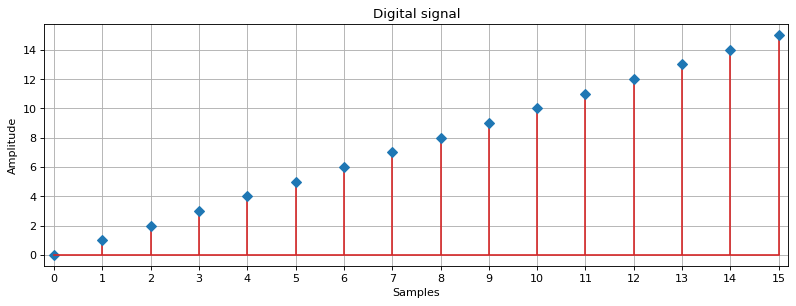

In [6]:
# Digital signal
xt = np.arange(16)

# Plot figure
fig = plt.figure(figsize=(12, 4), dpi=80)
plt.title('Digital signal') 
plt.stem(xt, linefmt='C3', markerfmt='D', use_line_collection=True)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.xticks(xt)
plt.xlim([np.min(xt)-0.2, np.max(xt)+0.2])
plt.grid(True)

В следующих главах мы познакомимся с различными формами сигналов, а также с операциями над ними: фильтрация, свёртка, преобразования в частотную область и обратно.